
# Project: Investigate a Dataset 

## Data set: No Show Appointments
###  

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Data source - No show appointments

#### This dataset collects information from 100k medical appointments in public hospitals at Vitoria, Brazil. Whether the patients show up or not for an appointment and what are the factors that affect the rate of showing up is the main focus of this data analysis. The dataset can be referred to here.(https://www.kaggle.com/joniarroba/noshowappointments)

#### The dataset gives information about patients' appointment schedule, age, gender and medical conditions like Diabetes or Hypertension. It also includes personal data like which neighbourhood the patients come from, are they enrolled in family welfare programs and whether or not they were sent SMS as reminders. 

#### The focal question of this analyis will be what factors are important for us to know in order to understand and predict if a patient will show up for their scheduled appointment?  Below specific questions will help us understand these factors
##### 1.  Does Gender play a role in No-Show appointments?
##### 2. Does a specific Age Group has higher Show up rate than others?
##### 3. What role SMSReceived play in show/no show rates?
#### 4. Do comorbidities like Hypertension and Diabetes play a role in Show up rates of patients? 
##### 5.  Does longer waiting time period increases likelihood of patients not showing up?
##### 6. Does it help to send SMS Reminders to people with longer waiting times? 

In [76]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
import datetime
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### This section will focus on data wrangling process of three steps - 
#### 1. Gather - Data is already available in the form of csv
#### 2. Assess - Both programmatic and visual
#### 3. Clean -  Improving quality and tidyness 

In [77]:
# Gather data
df = pd.read_csv('NoShowAppointments.csv')


### Visual and Programmatic Assessment

In [78]:
# check general info
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [79]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [81]:
type(df['AppointmentDay'][0]) 

str

** The column names No-show and SMS_received are not consistent in naming
also as clear in data No-show - no means a show up in appointment. This is a bit difficult to understand**

In [82]:
# check for null values
df.isnull().values.any()

False

**data has no null values**


In [83]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [84]:
# check for duplicates 
df.duplicated().any()

False

**no duplicates to remove**

In [85]:
# we see above that -1 is an age related edge case that can be removed from the analysis. 
print(df.Age[df.Age <= 0].count())


3540


**There are total 3540 records with 0 age. They should be removed**

In [86]:
# also age above 100 seems to be in edge case scenario.. Let's see the values. 
df[df.Age > 100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


** The age greater than 100 records can be removed**

In [87]:
df['AppointmentDay'].head(10)

0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
2    2016-04-29T00:00:00Z
3    2016-04-29T00:00:00Z
4    2016-04-29T00:00:00Z
5    2016-04-29T00:00:00Z
6    2016-04-29T00:00:00Z
7    2016-04-29T00:00:00Z
8    2016-04-29T00:00:00Z
9    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object

**From visual inspection of AppointmentDay column, it seems the time of the appointment is not recorded. 
To find Waiting time period, this will have to be considered so that the Waiting time is calculated correctly**

## Data Cleaning

### Assessment findings 

#### 1. Rename columns with inconsistent hyphens and incorrect spelling
#### 2. Invert No-Show to Show for clarity purposes
#### 3. Handcap column has irrelevant catgories in context of this analysis, hence to be removed
#### 4. Remove data with Age as 0 and -1 and above 100
#### 5. Age binning will be important to understand age related differences hence should be done
#### 6. The data type of ScheduledDay and AppointmentDay should be changed to DateTime from String
#### 7. ScheduledDay has time recorded in the values, and AppointmentDay does not. For analysis purposes, this time factor is irrelevant and should not be considered
#### 7. A new column WaitingTime to measure gap between ScheduledDay and AppointmentDay. This will help explore relationship between the difference of days and NoShow
#### 8. A new column WeekDay will help find relationship between WeekDay and NoShow


In [88]:
dfc = df.copy()

In [89]:
# Columns rename
dfc.rename(columns={"No-show": "Show", "SMS_received": "SMSReceived", "Handcap" : "Handicap", "Hipertension" : "Hypertension"}, inplace=True)
dfc.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [90]:
# Replace the values of Show columns to correct numerics
dfc["Show"].replace({"Yes": "0", "No": "1"}, inplace=True)
dfc['Show'] = pd.to_numeric(dfc['Show'])

In [91]:
# Having Handicap or not is of interest to us for analysis purposes

dfc['Handicap'].replace({2:1,3:1,4:1}, inplace = True)

In [92]:
dfc['Handicap'].unique()

array([0, 1])

In [93]:
# convert AppointmentDay and ScheduledDay to Datetime
dfc['ScheduledDay']=pd.to_datetime(dfc['ScheduledDay']) 
dfc['AppointmentDay']=pd.to_datetime(dfc['AppointmentDay'])

In [94]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMSReceived     110527 non-null  int64              
 13  Show          

In [95]:
dfc['WeekDay']= dfc['AppointmentDay'].apply(lambda x: x.strftime('%A'))

In [96]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMSReceived     110527 non-null  int64              
 13  Show          

In [97]:
dfc['WeekDay'].describe()

count        110527
unique            6
top       Wednesday
freq          25867
Name: WeekDay, dtype: object

**From visual inspection, it was observed that AppointmentDay columns does not have time recorded
Also to calculate WaitingTime, the time factor of a DateTime object does not matter. Hence we will
also convert the time part of ScheduledDay to zeroes similar to AppointmentDay**

In [98]:
dfc['ScheduledDay'] = dfc['ScheduledDay'].dt.normalize()

In [99]:
dfc['ScheduledDay']

0        2016-04-29 00:00:00+00:00
1        2016-04-29 00:00:00+00:00
2        2016-04-29 00:00:00+00:00
3        2016-04-29 00:00:00+00:00
4        2016-04-29 00:00:00+00:00
                    ...           
110522   2016-05-03 00:00:00+00:00
110523   2016-05-03 00:00:00+00:00
110524   2016-04-27 00:00:00+00:00
110525   2016-04-27 00:00:00+00:00
110526   2016-04-27 00:00:00+00:00
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns, UTC]

In [100]:
dfc['WaitingTime'] = dfc['AppointmentDay'] - dfc['ScheduledDay']

In [101]:
dfc['WaitingTime'].describe()

count                        110527
mean     10 days 04:24:31.828602965
std      15 days 06:07:11.673762786
min               -6 days +00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                15 days 00:00:00
max               179 days 00:00:00
Name: WaitingTime, dtype: object

In [102]:
dfc['WaitingTime'] = dfc['WaitingTime'].apply(lambda x: x.days) 

In [103]:
# data where ScheduledDay was before AppointmentDay
dfc.WaitingTime[dfc.WaitingTime < 0].count()

5

In [104]:
dfc[dfc.WaitingTime < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Show,WeekDay,WaitingTime
27033,7.839273e+12,5679978,M,2016-05-10 00:00:00+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,0,Monday,-1
55226,7.896294e+12,5715660,F,2016-05-18 00:00:00+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,Tuesday,-1
64175,2.425226e+13,5664962,F,2016-05-05 00:00:00+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,0,Wednesday,-1
71533,9.982316e+14,5686628,F,2016-05-11 00:00:00+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,0,Thursday,-6
72362,3.787482e+12,5655637,M,2016-05-04 00:00:00+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,0,Tuesday,-1


In [105]:
# The above 5 rows can be removed
df_wt = dfc.drop(dfc[dfc.WaitingTime < 0].index)

In [106]:
df_wt.reset_index(drop=True)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Show,WeekDay,WaitingTime
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday,0
1,5.589978e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday,0
2,4.262962e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,Friday,0
3,8.679512e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Friday,0
4,8.841186e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Friday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110517,2.572134e+12,5651768,F,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,1,Tuesday,35
110518,3.596266e+12,5650093,F,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,1,Tuesday,35
110519,1.557663e+13,5630692,F,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,1,Tuesday,41
110520,9.213493e+13,5630323,F,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,1,Tuesday,41


In [107]:
df_final = df_wt.drop(df_wt[df_wt.Age <= 0].index)

In [108]:
df_final.reset_index(drop=True)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Show,WeekDay,WaitingTime
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday,0
1,5.589978e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday,0
2,4.262962e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,Friday,0
3,8.679512e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Friday,0
4,8.841186e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Friday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106977,2.572134e+12,5651768,F,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,1,Tuesday,35
106978,3.596266e+12,5650093,F,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,1,Tuesday,35
106979,1.557663e+13,5630692,F,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,1,Tuesday,41
106980,9.213493e+13,5630323,F,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,1,Tuesday,41


In [109]:
df_final = df_final.drop(df_final[df_final.Age > 100].index)

In [110]:
df_final.reset_index(drop=True)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Show,WeekDay,WaitingTime
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday,0
1,5.589978e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday,0
2,4.262962e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,Friday,0
3,8.679512e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Friday,0
4,8.841186e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Friday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106970,2.572134e+12,5651768,F,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,1,Tuesday,35
106971,3.596266e+12,5650093,F,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,1,Tuesday,35
106972,1.557663e+13,5630692,F,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,1,Tuesday,41
106973,9.213493e+13,5630323,F,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,1,Tuesday,41


In [111]:
df_final.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Show,WaitingTime
count,1.069750e+05,1.069750e+05,106975.000000,106975.000000,106975.000000,106975.000000,106975.000000,106975.000000,106975.000000,106975.000000,106975.000000
mean,1.472708e+14,5.675433e+06,38.311540,0.101042,0.203786,0.074251,0.031409,0.020883,0.323290,0.797411,10.167385
std,2.558059e+14,7.133484e+04,22.458952,0.301386,0.402814,0.262180,0.174422,0.142995,0.467735,0.401931,15.263771
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173074e+12,5.640488e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.171784e+13,5.680742e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,9.433600e+13,5.725638e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,14.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


In [112]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106975 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       106975 non-null  float64            
 1   AppointmentID   106975 non-null  int64              
 2   Gender          106975 non-null  object             
 3   ScheduledDay    106975 non-null  datetime64[ns, UTC]
 4   AppointmentDay  106975 non-null  datetime64[ns, UTC]
 5   Age             106975 non-null  int64              
 6   Neighbourhood   106975 non-null  object             
 7   Scholarship     106975 non-null  int64              
 8   Hypertension    106975 non-null  int64              
 9   Diabetes        106975 non-null  int64              
 10  Alcoholism      106975 non-null  int64              
 11  Handicap        106975 non-null  int64              
 12  SMSReceived     106975 non-null  int64              
 13  Show          

# this completes our Data Cleaning process


## Exploratory Data Analysis

### This phase attempts to explore and analyse the data and relationship between its various properties in context of Research Questions




### Research Question 1 (Does Gender play a role in No-Show appointments?)

In [113]:
dfm = df_final.query("Gender == 'M'")
dfmg = dfm.groupby(['Gender'])['Show'].value_counts(normalize = True)
dfmg

Gender  Show
M       1       0.799197
        0       0.200803
Name: Show, dtype: float64

#### Above table shows Male Show-no Show percentage

In [114]:
dff = df_final.query("Gender == 'F'")
dffg = dff.groupby(['Gender'])['Show'].value_counts(normalize = True)
dffg

Gender  Show
F       1       0.796471
        0       0.203529
Name: Show, dtype: float64

#### Above table shows Female Show-no Show percentage

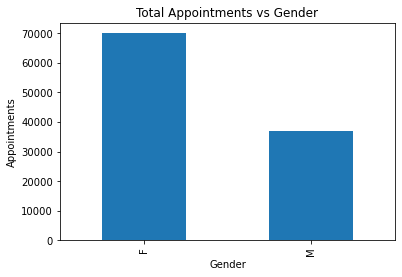

In [115]:
# total appointments made per gender
dft = df_final.groupby(['Gender']).size()
ax = dft.plot.bar(title = 'Total Appointments vs Gender')

# set labels for both axes
ax.set(xlabel='Gender', ylabel='Appointments')
plt.show()

#### As clear from above, the total female appointments are almost double than male appointments

Text(0.5, 1.0, 'Male -show/no-show in percentage')

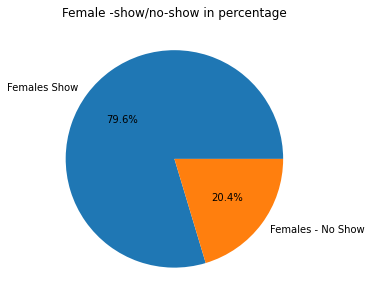

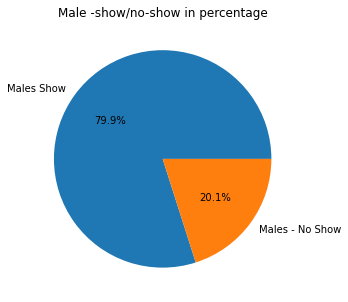

In [116]:
# Rate of Show/No Show based on Gender

labels = ["Females Show", "Females - No Show"]
plt.figure(figsize=(5,5))
plt.pie(dffg,labels = labels, autopct = '%1.1f%%')
plt.title('Female -show/no-show in percentage')

labels = ["Males Show", "Males - No Show"]
plt.figure(figsize=(5,5))
plt.pie(dfmg, labels = labels, autopct = '%1.1f%%')
plt.title('Male -show/no-show in percentage')

#### as apparent from above, rate of show up for males is slightly higer than females

### Research Question 2 
####  Does a specific Age Group has higher Show up rate than others?


#### In order to answer this question, we need to add age groups and arrange data according to the age groups. 

In [117]:
age_bins=[0,10,20,30,40,50,60,70,80,90,100] 

age_cat=['0-10', '10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']

newAgeDf = df_final.copy()

newAgeDf['Age categories']= pd.cut(newAgeDf['Age'],age_bins,labels=age_cat)


In [118]:
newAgeDf.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Show,WaitingTime
count,1.069750e+05,1.069750e+05,106975.000000,106975.000000,106975.000000,106975.000000,106975.000000,106975.000000,106975.000000,106975.000000,106975.000000
mean,1.472708e+14,5.675433e+06,38.311540,0.101042,0.203786,0.074251,0.031409,0.020883,0.323290,0.797411,10.167385
std,2.558059e+14,7.133484e+04,22.458952,0.301386,0.402814,0.262180,0.174422,0.142995,0.467735,0.401931,15.263771
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173074e+12,5.640488e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.171784e+13,5.680742e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,9.433600e+13,5.725638e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,14.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


In [119]:
newAgeDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106975 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       106975 non-null  float64            
 1   AppointmentID   106975 non-null  int64              
 2   Gender          106975 non-null  object             
 3   ScheduledDay    106975 non-null  datetime64[ns, UTC]
 4   AppointmentDay  106975 non-null  datetime64[ns, UTC]
 5   Age             106975 non-null  int64              
 6   Neighbourhood   106975 non-null  object             
 7   Scholarship     106975 non-null  int64              
 8   Hypertension    106975 non-null  int64              
 9   Diabetes        106975 non-null  int64              
 10  Alcoholism      106975 non-null  int64              
 11  Handicap        106975 non-null  int64              
 12  SMSReceived     106975 non-null  int64              
 13  Show          

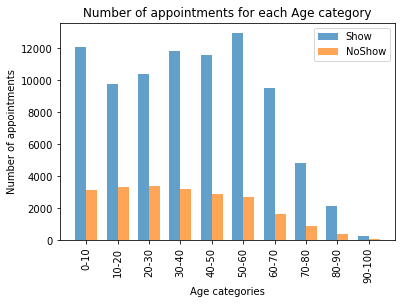

In [120]:
# Count of appointments for show/no-show with respect to age groups

temp1 = newAgeDf[newAgeDf['Show']==1] 
temp0 = newAgeDf[newAgeDf['Show']==0] 


dfShow = (temp1.groupby('Age categories')['Show'].count()).values
dfNoShow = (temp0.groupby('Age categories')['Show'].count()).values

numBins =np.arange(10)
width=.35

#plotting both in the same graph.

plt.bar(numBins, dfShow, width,  alpha=.7, label='Show');
plt.bar(numBins + width, dfNoShow, width, alpha=.7, label='NoShow');
locations = numBins + width / 2
labels =  [ '0-10', '10-20', '20-30', '30-40',
                  '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'];
plt.xticks(locations, labels,rotation='vertical');
plt.xlabel('Age categories');
plt.ylabel('Number of appointments');
plt.title('Number of appointments for each Age category');
plt.legend();

#### In above plot, we can see that number of appointments tend to decrease as we move towards older than 60 age groups. High number of appointemnts are made till the age group 60.
#### Age group 0-10 and 50-60 have higest number of appointments


In [121]:
percent = newAgeDf.groupby('Age categories')['Show'].value_counts(normalize=True).mul(100)
percent


Age categories  Show
0-10            1       79.301729
                0       20.698271
10-20           1       74.751871
                0       25.248129
20-30           1       75.380932
                0       24.619068
30-40           1       78.532988
                0       21.467012
40-50           1       80.097087
                0       19.902913
50-60           1       82.625631
                0       17.374369
60-70           1       85.271249
                0       14.728751
70-80           1       84.460759
                0       15.539241
80-90           1       84.034605
                0       15.965395
90-100          1       80.398671
                0       19.601329
Name: Show, dtype: float64

#### above table shows the calculated percentage of people who showed up per age category. 

In [122]:
## defining a function that will plot categories with respect to percentage on the y axis
## this function is also utilized later in analysing other questions 
def Plot_Categories(df, title, ylabel, xlabel, unstack):

    ax = df.unstack(unstack).plot.bar(color = ['orange', 'blue'], rot=90, 
                                      title = title)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlabel(xlabel, fontsize = 12)
    plt.rcParams["figure.figsize"] = (15,10)

    bars = ax.patches
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2., 
           bar.get_height(),
           f'{bar.get_height():.3}',
           ha="center", va="bottom", color="r")
    
    plt.show()

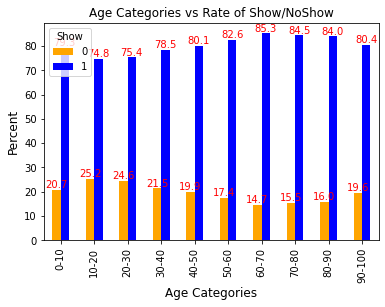

In [123]:
Plot_Categories(df = percent, title = 'Age Categories vs Rate of Show/NoShow', ylabel = 'Percent', xlabel = 'Age Categories', unstack = 'Show')

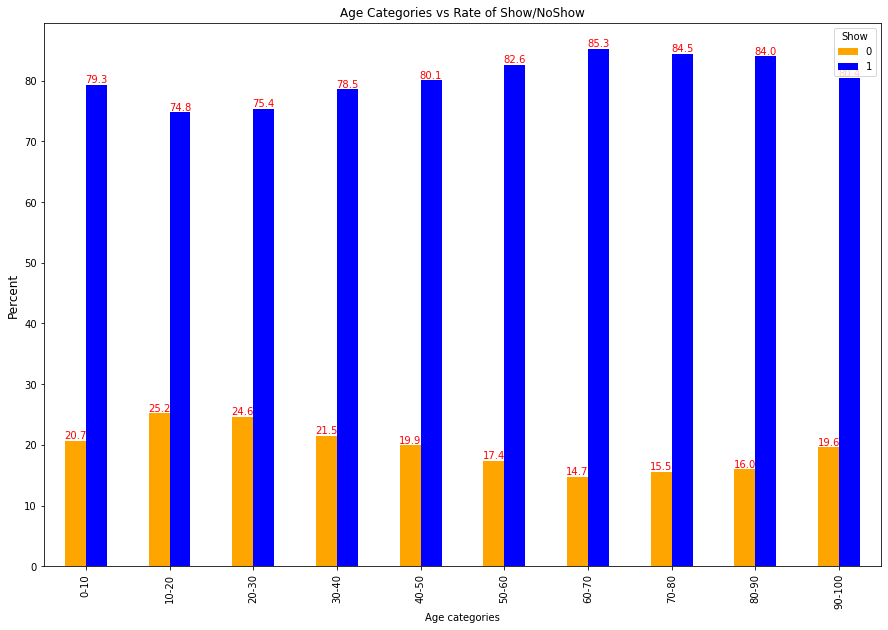

In [124]:
# plot the rate of percentage

ax = percent.unstack('Show').plot.bar(color = ['orange', 'blue'], rot=90, 
                                      title = 'Age Categories vs Rate of Show/NoShow')
ax.set_ylabel("Percent", fontsize=12)
plt.rcParams["figure.figsize"] = (15,10)

bars = ax.patches
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2., 
           bar.get_height(),
           f'{bar.get_height():.3}',
           ha="center", va="bottom", color="r")
    
plt.show()

#### from the above graph, its clear that the No show rates are slightly higher in age group 10-30 the no show rates tend to lower towards the older age grup that is more than 40. Show rates are slightly higher in the age groups 40 to 80

### Research Question 3 
####  What role SMSReceived play in show/no show rates?


In [125]:
dfse = df_final.query("SMSReceived == 1")['Show'].value_counts(normalize = True)
dfse


1    0.72334
0    0.27666
Name: Show, dtype: float64

In [126]:
dfse = df_final.groupby('SMSReceived')['Show'].value_counts(normalize = True)
dfse

SMSReceived  Show
0            1       0.832797
             0       0.167203
1            1       0.723340
             0       0.276660
Name: Show, dtype: float64

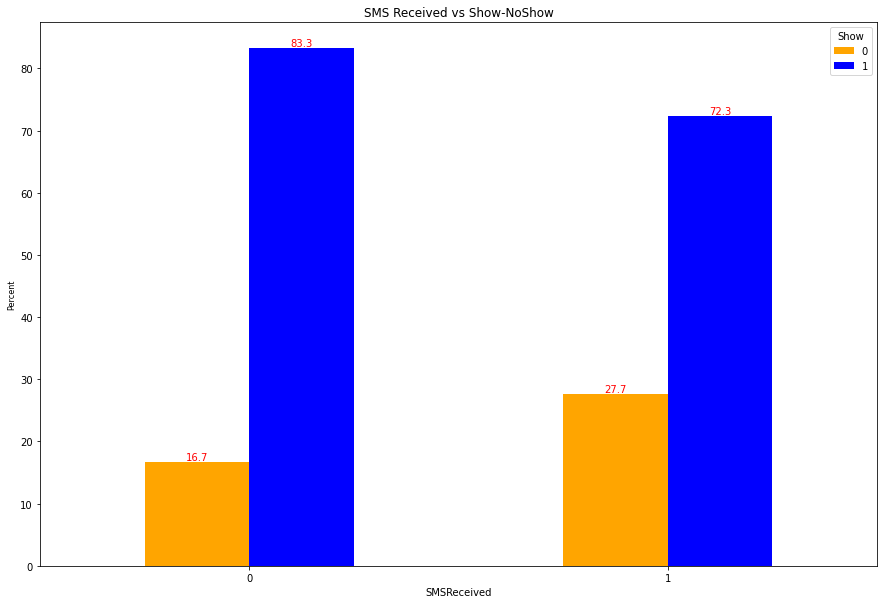

In [127]:
ax = dfse.unstack('Show').mul(100).plot.bar(rot=0, color = ['orange', 'blue'], title = 'SMS Received vs Show-NoShow')
ax.set_ylabel("Percent", fontsize=8)
plt.rcParams["figure.figsize"] = (5,5)
bars = ax.patches
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2., 
           bar.get_height(),
           f'{bar.get_height():.3}',
           ha="center", va="bottom", color="r")
    
plt.show()

#### Above graph indicates that rate of not showing up is higher in those who received SMS as compared to those who did not receive. This looks a bit peculiar and cannot be concluded from the data we have.
#### We need to explore other factors. SMSReceived alone does not affect the rate of show/no-show




### Research Question 4: Does a specific comorbidity affect Show-NoShow Rate?


<Figure size 2160x1440 with 0 Axes>

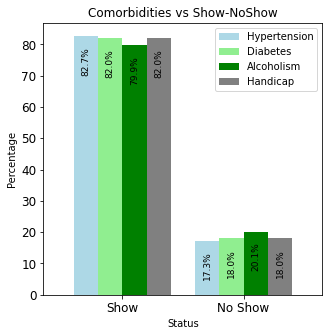

In [128]:
per_hyp = df_final[df_final['Hypertension'] == 1]['Show'].value_counts(normalize=True)*100
per_dia = df_final[df_final['Diabetes'] == 1]['Show'].value_counts(normalize=True)*100
per_alc = df_final[df_final['Alcoholism'] == 1]['Show'].value_counts(normalize=True)*100
per_hand = df_final[df_final['Handicap'] == 1]['Show'].value_counts(normalize=True)*100

x_labels = ["Show", "No Show"]

newdf = pd.DataFrame(
    {'Status': x_labels,
     'Hypertension': per_hyp,
     'Diabetes': per_dia,
     'Alcoholism' : per_alc,
     'Handicap': per_hand
    })
plt.figure(figsize=(30,20))
ax = newdf.plot(x= "Status", y=["Hypertension", "Diabetes", "Alcoholism", "Handicap"], kind="bar", 
                color = ['lightblue', 'lightgreen', 'green', 'grey'],
               width = .8, rot = 0, fontsize = 12)

ax.set_ylabel('Percentage')
ax.set_title('Comorbidities vs Show-NoShow')
ax.set_xticklabels(x_labels)
ax.legend()

for p in ax.patches:
   
    x = p.get_x() + .1
    y = p.get_height() - 12
    ax.text(x, y , "{:.1f}".format(p.get_height()) + "%",
            fontsize=9,
            ha='center',
            rotation='vertical')


#### In the graph above, one can see that the NoShow rate of people with alcoholism is slightly higher than those with Handicap and Diabetes. People with Hypertension have highest Show up rate in all the four conditions.

## Research Question 5: Does longer waiting time period increases likelihood of patients not showing up? 

### Waiting time vs Show/NoShow 


In [129]:
df_Show = df_final[df_final['Show'] == 1]
df_Show.WaitingTime.describe()

count    85303.000000
mean         8.738005
std         14.558582
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max        179.000000
Name: WaitingTime, dtype: float64

In [130]:
df_NoShow = df_final[df_final['Show'] == 0]
df_NoShow.WaitingTime.describe()

count    21672.000000
mean        15.793559
std         16.615545
min          0.000000
25%          4.000000
50%         11.000000
75%         23.000000
max        179.000000
Name: WaitingTime, dtype: float64

** mean waiting time for people who showed up is 8 days as compared to people who did not show up which is 15 days **

In [131]:
### adding categories / groups for waiting time 

wt_bins=[0,7,15,30,60,90,120,150,180] 

wt_cat=['0-7','7-15','15-30','30-60','60-90','90-120','120-150','150-180']

newWTDf = df_final.copy()

newWTDf['WaitingTimeGroups']= pd.cut(newWTDf['WaitingTime'], wt_bins, labels = wt_cat, include_lowest = True)

newWTDf.head(10)



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Show,WeekDay,WaitingTime,WaitingTimeGroups
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday,0,0-7
1,5.589978e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday,0,0-7
2,4.262962e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,Friday,0,0-7
3,8.679512e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Friday,0,0-7
4,8.841186e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Friday,0,0-7
5,9.598513e+13,5626772,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,1,Friday,2,0-7
6,7.336882e+14,5630279,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,0,Friday,2,0-7
7,3.449833e+12,5630575,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,0,Friday,2,0-7
8,5.639473e+13,5638447,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,1,Friday,0,0-7
9,7.812456e+13,5629123,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,1,Friday,2,0-7


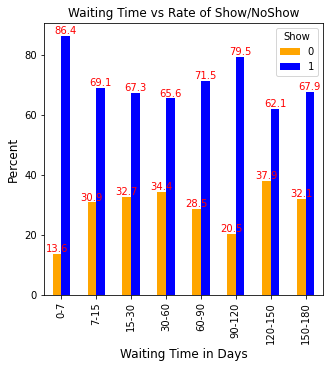

In [132]:
dfwtDfSeries = newWTDf.groupby('WaitingTimeGroups')['Show'].value_counts(normalize = True).mul(100)
Plot_Categories(df = dfwtDfSeries, title = 'Waiting Time vs Rate of Show/NoShow', ylabel = 'Percent', xlabel = 'Waiting Time in Days', unstack = 'Show')

** In the above graph, we see that waiting times in 0-7 days range has highest rate of show up owing to the urgency. Show up rate decreases for waiting time periods between 7 to 60 days. However for waiting time period between 2 - 3 months, we see an increase in show up rates. It decreases for very long waiting times - that is more than 3 months** 

## Research Question 6:  Does it help to send SMS Reminders to people with longer waiting times? ##

In [133]:
dfShow = newWTDf.query("SMSReceived == 1")
dfGShow = dfShow.groupby('WaitingTimeGroups')['Show'].value_counts(normalize = True).mul(100)

dfNoShow = newWTDf.query("SMSReceived == 0")
dfGNoShow = dfNoShow.groupby('WaitingTimeGroups')['Show'].value_counts(normalize = True).mul(100)


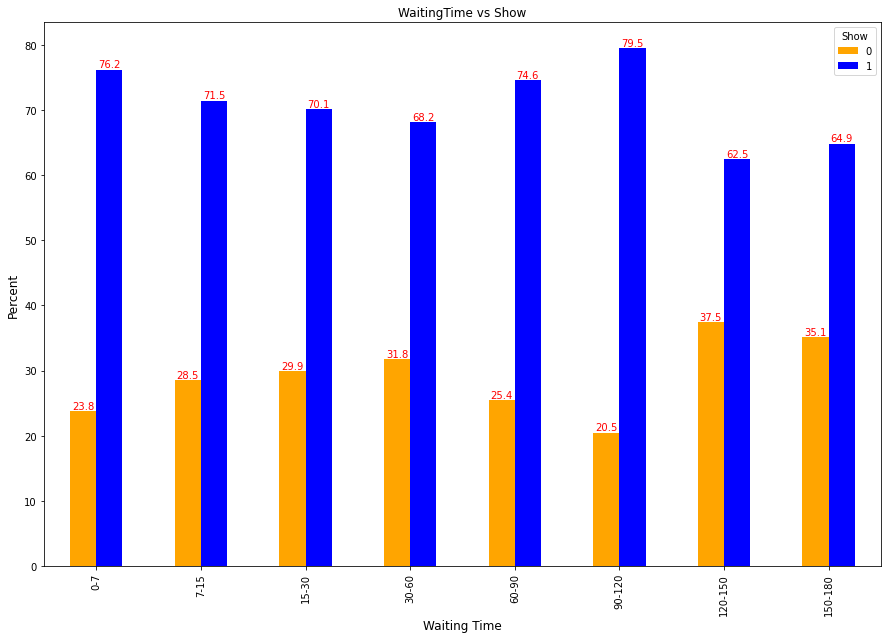

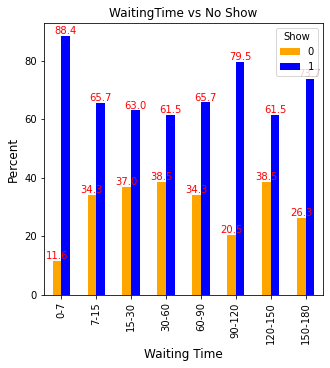

In [134]:
ax = dfGShow.unstack('Show').plot.bar(color = ['orange', 'blue'], rot=90, 
                                      title = 'WaitingTime vs Show')
ax.set_ylabel('Percent', fontsize=12)
ax.set_xlabel('Waiting Time', fontsize = 12)
plt.rcParams["figure.figsize"] = (5,5)

bars = ax.patches
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2., 
        bar.get_height(),
        f'{bar.get_height():.3}',
        ha="center", va="bottom", color="r")
    
plt.show()

ax = dfGNoShow.unstack('Show').plot.bar(color = ['orange', 'blue'], rot=90, 
                                      title = 'WaitingTime vs No Show')
ax.set_ylabel('Percent', fontsize=12)
ax.set_xlabel('Waiting Time', fontsize = 12)
plt.rcParams["figure.figsize"] = (5,5)

bars = ax.patches
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2., 
        bar.get_height(),
        f'{bar.get_height():.3}',
        ha="center", va="bottom", color="r")
    
plt.show()

** In the above graphs we can see that for time periods between 7-90 days, the show up rate is higher for those who received SMS as compared to those who did not received SMS**

<a id='conclusions'></a>
## Conclusions

### Research Question 1 (Does Gender play a role in No-Show appointments?)

1. Total number of appointments for females are almost twice than that of taken by males 
2. Show-up rate for females are lower than male show-up rate by very low margin. We can say they are almost similar. However the data given here is not sufficient to understand the specific profile of genders to generalize. 

### Research Question 2 
####  Does a specific Age Group has higher Show up rate than others?

1. No-show rates are slightly higher in age group 10-30
2. No-show rates tend to lower towards the older age group (40 and above)

### Research Question 3 
####  What impact SMSReceived play in show/no show rates?

1. From the small analysis, it was tendencial that people who received SMS tend to have higher NoShow rates or Lower show-up rates. This needs to be explored further because this cannot be concluded clearly only analysing data for two variables - SMSReceived and Show/NoShow. This analysis here is limited in that respect and further exploration with other variables (Waiting Time between Scheduled Day and Appointment Day) should be performed

### Research Question 4
#### Does a specific comoribidity affect Show-NoShow Rate?

1. From the given four comorbidities - Hypertension, Diabetes, Alcoholism and Handicap, people with Alcoholism show slightly higher rate of No-Shows. 
2. People with Hypertension, Diabetes and Handicap tend to have similar rate of Showing up, slightly on the higher side of 80%

### Research Question 5
#### Does longer waiting time period increases likelihood of patients not showing up? 

1. Waiting times in 0-7 days range has highest rate of show up owing to the urgency almost 81%. Show up rate decreases for waiting time periods between 7 to 60 days hitting 65%. However for waiting time period between 2 - 3 months, we see an increase in show up rates of around 5-6% from 65% to 71%. It decreases for very long waiting times - that is more than 3 months** 

### Research Question 6
#### Does it help to send SMS Reminders to people with longer waiting times?

1. SMS Reminder indeed do help for time periods between 7-90 days, where we see the show up rate is slightly higher for those who received SMS as compared to those who did not received SMS. For urgent category with waiting time under 7 days, it does not matter, as people who did not receive SMS had higher rate of showing up. Similarly for waiting time higher than 3 months, both categories of people - SMS received or not received had similar show up rates**



## Limitations
1. Individual analysis of factors like WaitingTime vs Show up rate or Comorbidities vs Showup rate provide only trends. These can vary based on other factors. A combined analysis of multiple factors like WaitingTime, SMS Received, Age, Gender and Comorbidities may help us understand the trends better. This analysis is limited in this regard
2. No predictive analysis is performed, in the sense we can only understand trends. However predictive analyisis and determining probability of a person showing up is out of scope for this analysis.
3. For Comorbitiies, perhaps more information is needed. For example how severe is hypertension/diabetes.  From common sense, we know that if the matter is urgent, person will definitely show up. However this information is missing from this data set
4. Neighbourhood, scholorships also are only single columns that are limited in providing trends. One can only know which neighbourhood had higher rate of showing up, but fails to understand why. Perhaps the neighbourhood which are closer to the hospital have more show-up rate? This detailed information is missing and hence only a limited understanding of the trend can be formulated.
